In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from tqdm.notebook import tqdm_notebook
import requests
import os

# 1. Filtrar os dados para selecionar apenas aqueles referentes ao estado do Piauí.

## 1.1 Carregando os dados

In [ ]:
os.chdir('/content/drive/MyDrive/Sistemas_de_Informação/Sistemas inteligentes/RESOLUÇÕES/atv_01')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Sistemas_de_Informação/Sistemas inteligentes/RESOLUÇÕES/atv_01'

In [ ]:
DATASET_PATH = 'datasets/'
DATASET_NAME = 'caso_covid.csv'

In [ ]:
def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

In [ ]:
dfCasos = load_data(DATASET_PATH,DATASET_NAME)

In [ ]:
dfCasos

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132
1,2022-03-26,AP,NaN,state,160321,2122,733,False,845731.0,861773.0,16.0,18603.62300,0.0132
2,2022-03-25,AP,NaN,state,160314,2122,732,False,845731.0,861773.0,16.0,18602.81072,0.0132
3,2022-03-24,AP,NaN,state,160301,2122,731,False,845731.0,861773.0,16.0,18601.30220,0.0132
4,2022-03-23,AP,NaN,state,160288,2122,730,False,845731.0,861773.0,16.0,18599.79368,0.0132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837998,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2837999,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2838000,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2838001,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000


## 1.2 Filtrando os dados 

### 1.2.1 Selecionando os casos do Piauí

In [ ]:
dfCasosPI = dfCasos[dfCasos['state'] == 'PI']

In [ ]:
dfCasosPI

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1095342,2022-03-26,PI,NaN,state,367515,7721,738,True,3273227.0,3281480.0,22.0,11199.67210,0.021
1095343,2022-03-25,PI,NaN,state,367511,7720,737,False,3273227.0,3281480.0,22.0,11199.55020,0.021
1095344,2022-03-24,PI,NaN,state,367490,7719,736,False,3273227.0,3281480.0,22.0,11198.91025,0.021
1095345,2022-03-23,PI,NaN,state,367441,7718,735,False,3273227.0,3281480.0,22.0,11197.41702,0.021
1095346,2022-03-22,PI,NaN,state,367308,7718,734,False,3273227.0,3281480.0,22.0,11193.36397,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246679,2020-04-27,PI,Água Branca,city,6,0,5,False,17411.0,17470.0,2200202.0,34.34459,0.000
1246680,2020-04-26,PI,Água Branca,city,4,0,4,False,17411.0,17470.0,2200202.0,22.89639,0.000
1246681,2020-04-25,PI,Água Branca,city,4,0,3,False,17411.0,17470.0,2200202.0,22.89639,0.000
1246682,2020-04-24,PI,Água Branca,city,4,0,2,False,17411.0,17470.0,2200202.0,22.89639,0.000


### 1.2.2 Selecionando os dados mais recentes

In [ ]:
dfCasosPI2 = dfCasosPI[(dfCasosPI['place_type']=='city') & (dfCasosPI['is_last'] == True)]

In [ ]:
dfCasosPI2

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1096080,2022-03-26,PI,Acauã,city,228,2,658,True,7084.0,7102.0,2200053.0,3210.36328,0.0088
1096738,2022-03-26,PI,Agricolândia,city,829,10,650,True,5139.0,5131.0,2200103.0,16156.69460,0.0121
1097388,2022-03-26,PI,Alagoinha do Piauí,city,402,13,664,True,7651.0,7665.0,2200251.0,5244.61840,0.0323
1098052,2022-03-26,PI,Alegrete do Piauí,city,553,9,646,True,4915.0,4918.0,2200277.0,11244.40830,0.0163
1098698,2022-03-26,PI,Alto Longá,city,858,15,680,True,14304.0,14339.0,2200301.0,5983.68087,0.0175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243291,2022-03-26,PI,Vila Nova do Piauí,city,349,3,689,True,2971.0,2952.0,2211605.0,11822.49322,0.0086
1243980,2022-03-26,PI,Várzea Branca,city,204,12,666,True,4947.0,4938.0,2211357.0,4131.22722,0.0588
1244646,2022-03-26,PI,Várzea Grande,city,561,1,697,True,4391.0,4386.0,2211407.0,12790.69767,0.0018
1245343,2022-03-26,PI,Wall Ferraz,city,335,3,642,True,4462.0,4471.0,2211704.0,7492.73093,0.0090


In [ ]:
dfCasosPI2.to_csv('casoCovidPI.csv',index=False)

# 2. Plotar um mapa com a localização e número de casos.

## 2.1 Capturando as latitudes e longitudes com openstreetmaps

In [ ]:
cidades = list(dfCasosPI2['city'])
print(len(cidades))

224


In [ ]:
cidades[0:5]

['Acauã',
 'Agricolândia',
 'Alagoinha do Piauí',
 'Alegrete do Piauí',
 'Alto Longá']

In [ ]:
latitudes = []
longitudes = []
for cid in tqdm_notebook(cidades):
    request = 'https://nominatim.openstreetmap.org/search?city='+cid+'&state=Piaui&format=json'
    response = requests.get(request)
    response_data = response.json()[0]
    
    latitude = float(response_data["lat"])
    longitude = float(response_data["lon"])
    latitudes.append(latitude)
    longitudes.append(longitude)

  0%|          | 0/224 [00:00<?, ?it/s]

## 2.2 Add latitude e longitude no dataframe

In [ ]:
dfCasosPI2.loc[:,'lat'] = latitudes
dfCasosPI2.loc[:,'lon'] = longitudes
dfCasosPI2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,lat,lon
1096080,2022-03-26,PI,Acauã,city,228,2,658,True,7084.0,7102.0,2200053.0,3210.36328,0.0088,-8.330391,-40.984188
1096738,2022-03-26,PI,Agricolândia,city,829,10,650,True,5139.0,5131.0,2200103.0,16156.69460,0.0121,-5.796784,-42.660513
1097388,2022-03-26,PI,Alagoinha do Piauí,city,402,13,664,True,7651.0,7665.0,2200251.0,5244.61840,0.0323,-7.009095,-40.939675
1098052,2022-03-26,PI,Alegrete do Piauí,city,553,9,646,True,4915.0,4918.0,2200277.0,11244.40830,0.0163,-7.244014,-40.860230
1098698,2022-03-26,PI,Alto Longá,city,858,15,680,True,14304.0,14339.0,2200301.0,5983.68087,0.0175,-5.254905,-42.207239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243291,2022-03-26,PI,Vila Nova do Piauí,city,349,3,689,True,2971.0,2952.0,2211605.0,11822.49322,0.0086,-7.142922,-40.937856
1243980,2022-03-26,PI,Várzea Branca,city,204,12,666,True,4947.0,4938.0,2211357.0,4131.22722,0.0588,-9.286817,-42.817389
1244646,2022-03-26,PI,Várzea Grande,city,561,1,697,True,4391.0,4386.0,2211407.0,12790.69767,0.0018,-6.546083,-42.248040
1245343,2022-03-26,PI,Wall Ferraz,city,335,3,642,True,4462.0,4471.0,2211704.0,7492.73093,0.0090,-7.233920,-41.911407


## 2.3 Plotando o mapa

In [ ]:
map = folium.Map(
    location= dfCasosPI2[["lat", "lon"]].mean().to_list(), 
    zoom_start=7)

for index, location_info in dfCasosPI2.iterrows():
    
    confirmed = str(location_info["confirmed"])
    city = str(location_info["city"])

    icon = folium.DivIcon(
        icon_size=(250,36),
        icon_anchor=(0,0),
        html=f'<div style="font-size: 10pt; color: black; font-weight: bold"> {confirmed}</div>',
        )

    folium.Marker(
        [location_info["lat"], location_info["lon"]], 
        tooltip= city,
        icon=icon,
        popup= city
        
    ).add_to(map)


map

# 3. Indicar o número de amostras, atributos e dados faltantes (se existir) do conjunto de dados

In [ ]:
dfCasosPI2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 1096080 to 1245985
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            224 non-null    object 
 1   state                           224 non-null    object 
 2   city                            224 non-null    object 
 3   place_type                      224 non-null    object 
 4   confirmed                       224 non-null    int64  
 5   deaths                          224 non-null    int64  
 6   order_for_place                 224 non-null    int64  
 7   is_last                         224 non-null    bool   
 8   estimated_population_2019       224 non-null    float64
 9   estimated_population            224 non-null    float64
 10  city_ibge_code                  224 non-null    float64
 11  confirmed_per_100k_inhabitants  224 non-null    float64
 12  death_rate                

In [ ]:
dfCasosPI2.shape

(224, 15)

In [ ]:
#dados nulos
dfCasosPI2.isnull().sum()

date                              0
state                             0
city                              0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
lat                               0
lon                               0
dtype: int64

# 4. Apresentar as estatísticas descritivas dos atributos não categóricos

In [ ]:
dfCasosPI2.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,lat,lon
count,224.000000,224.000000,224.000000,224.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,1640.691964,34.468750,672.339286,14612.620536,14649.464286,2.205694e+06,8815.041859,0.025938,-6.687085,-42.405394
std,8166.097436,188.018721,27.566000,58886.634217,59102.962350,3.333670e+03,5032.709500,0.023238,1.852262,1.102763
min,25.000000,1.000000,560.000000,1246.000000,1242.000000,2.200053e+06,724.427700,0.001800,-10.814913,-45.919955
25%,277.500000,5.000000,656.750000,4503.000000,4511.000000,2.202690e+06,4849.050675,0.013300,-7.869530,-42.815809
50%,500.000000,10.000000,674.000000,6246.500000,6250.500000,2.205548e+06,7833.581075,0.020500,-6.971350,-42.248402
75%,993.250000,19.000000,694.000000,10715.250000,10725.250000,2.208662e+06,11722.772693,0.031125,-5.360869,-41.673860
max,119192.000000,2760.000000,734.000000,864845.000000,868075.000000,2.211704e+06,27500.000000,0.152200,-2.852008,-40.614725


# 5. Apresentar os histogramas dos atributos não categóricos

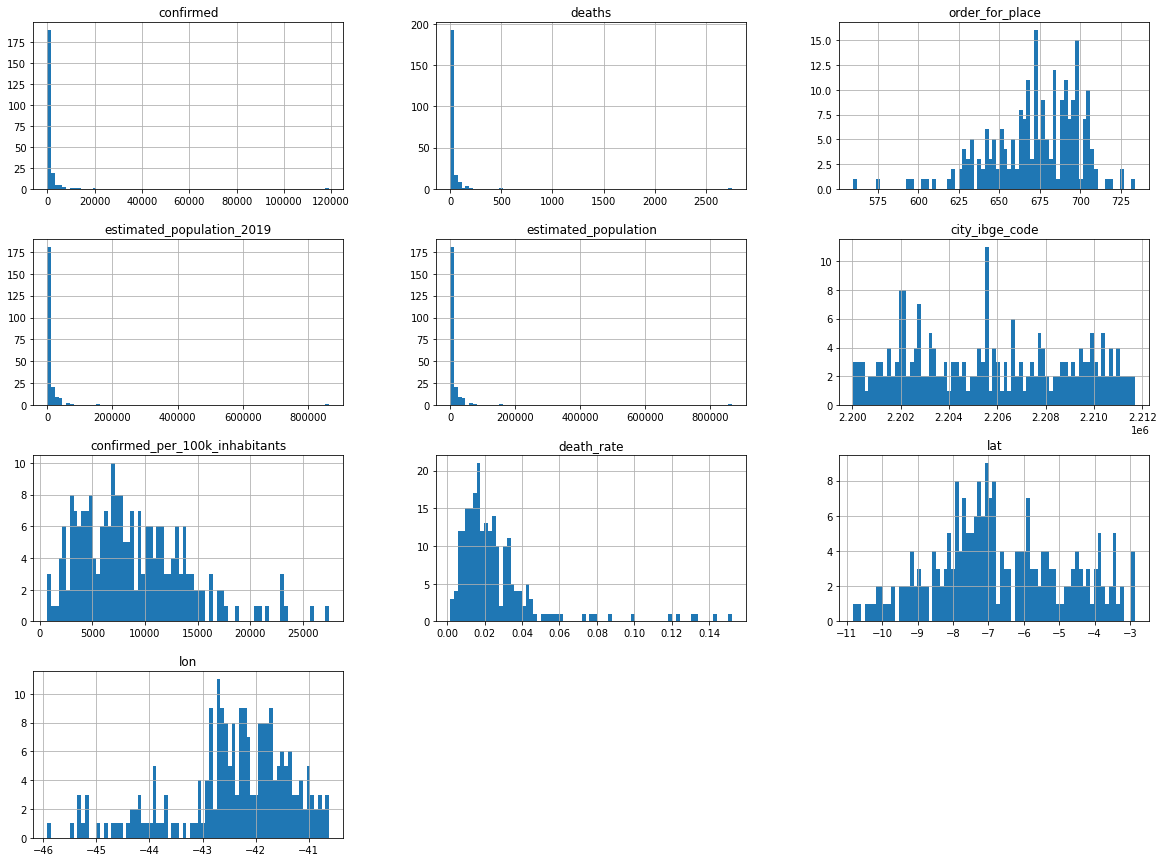

In [ ]:
dfCasosPI2.hist(bins=75, figsize=(20,15))
plt.show()

# 6. Capturar as latitudes e longitudes para cada 1 dos municípios presentes na base de dados e adicionar as colunas latitude e longitude nos dados

In [ ]:
dfCasosPI2.loc[:,'lat'] = latitudes
dfCasosPI2.loc[:,'lon'] = longitudes
dfCasosPI2

# 7. Apresentar um gráfico da latitude x longitude

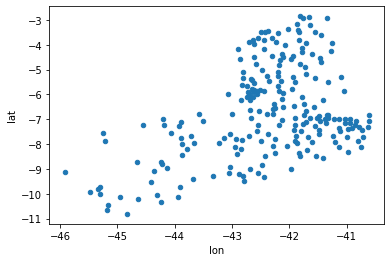

In [ ]:
dfCasosPI2.plot(kind="scatter", x="lon", y="lat")

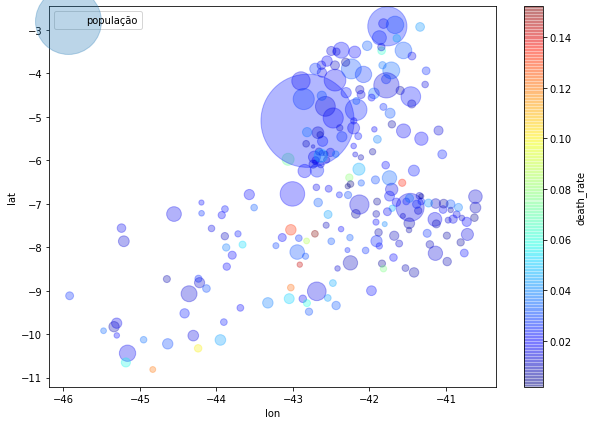

In [ ]:
dfCasosPI2.plot(kind='scatter', x='lon', y='lat', alpha=0.3,
    s=dfCasosPI2['estimated_population']/100, label='população', figsize=(10,7),
    c='death_rate', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)
plt.legend()

# 8. Calcular a matriz de correlação;

In [ ]:
matriz = dfCasosPI2.corr()

In [ ]:
matriz

,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,latitude,longitude
confirmed,1.000000,0.996755,0.241685,NaN,0.996277,0.996275,0.106979,0.171124,-0.042708,0.114538,-0.014501
deaths,0.996755,1.000000,0.234446,NaN,0.997786,0.997791,0.106261,0.129136,-0.010849,0.116605,-0.015808
order_for_place,0.241685,0.234446,1.000000,NaN,0.246578,0.246476,0.020177,0.209144,-0.010620,0.206075,0.084769
is_last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estimated_population_2019,0.996277,0.997786,0.246578,NaN,1.000000,1.000000,0.104996,0.118028,-0.022951,0.120067,-0.011834
estimated_population,0.996275,0.997791,0.246476,NaN,1.000000,1.000000,0.104970,0.117971,-0.022938,0.119977,-0.011888
city_ibge_code,0.106979,0.106261,0.020177,NaN,0.104996,0.104970,1.000000,-0.042297,0.093274,-0.064117,-0.007414
confirmed_per_100k_inhabitants,0.171124,0.129136,0.209144,NaN,0.118028,0.117971,-0.042297,1.000000,-0.488274,0.188989,-0.000146
death_rate,-0.042708,-0.010849,-0.010620,NaN,-0.022951,-0.022938,0.093274,-0.488274,1.000000,-0.166589,-0.169593
latitude,0.114538,0.116605,0.206075,NaN,0.120067,0.119977,-0.064117,0.188989,-0.166589,1.000000,0.426523


# 9. Verificar a correlação entre o atributo death_rate e os demais atributos não categóricos

In [ ]:
matriz['death_rate'].sort_values(ascending=False)

death_rate                        1.000000
city_ibge_code                    0.093274
order_for_place                  -0.010620
deaths                           -0.010849
estimated_population             -0.022938
estimated_population_2019        -0.022951
confirmed                        -0.042708
latitude                         -0.166589
longitude                        -0.169593
confirmed_per_100k_inhabitants   -0.488274
is_last                                NaN
Name: death_rate, dtype: float64